In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Train.csv')

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [ ]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# all categorical columns
cat_cols = df.select_dtypes(include='object').columns

In [ ]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
num_cols = df.select_dtypes(exclude='object').columns

In [ ]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
for col in cat_cols:
    print(col , len(df[col].unique()))

Item_Identifier 1559
Item_Fat_Content 5
Item_Type 16
Outlet_Identifier 10
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4


In [ ]:
for num in num_cols:
  print(num,len(df[num].unique()))

Item_Weight 416
Item_Visibility 7880
Item_MRP 5938
Outlet_Establishment_Year 9
Item_Outlet_Sales 3493


In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
df.Item_Identifier.value_counts()

,count
Item_Identifier,
FDW13,10
FDG33,10
FDX31,9
FDT07,9
NCY18,9
...,...
FDO33,1
FDK57,1
FDT35,1


In [ ]:
df.Outlet_Location_Type.value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [ ]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
df.Item_Type.value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.Item_Weight.value_counts()

,count
Item_Weight,
12.857645,1463
12.150000,86
17.600000,82
13.650000,77
11.800000,76
...,...
5.210000,2
9.420000,1
7.685000,1


In [ ]:
df.Outlet_Establishment_Year.value_counts()

,count
Outlet_Establishment_Year,
1985,1463
1987,932
1999,930
1997,930
2004,930
2002,929
2009,928
2007,926
1998,555


In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.groupby('Item_Identifier')['Item_Weight'].mean()

,Item_Weight
Item_Identifier,
DRA12,11.600000
DRA24,17.495041
DRA59,9.416911
DRB01,9.212548
DRB13,6.115000
...,...
NCZ30,7.485378
NCZ41,19.850000
NCZ42,10.500000


In [ ]:
df.groupby('Outlet_Size').agg({'Outlet_Size': np.size})

,Outlet_Size
Outlet_Size,
High,932
Medium,5203
Small,2388


In [ ]:
df['Outlet_Size'].isnull().sum()

np.int64(0)

In [ ]:
 df.groupby(['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Medium          555
                   Small           528
Supermarket Type1  High            932
                   Medium         2785
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [ ]:
df[df['Item_Visibility']==0].shape

(526, 12)

In [ ]:
df.Item_Visibility.mean()
df['Item_Visibility'].replace(0,df.Item_Visibility.mean(),inplace=True)  # replacing zeros with mean

In [ ]:
df['Item_Visibility']

,Item_Visibility
0,0.016047
1,0.019278
2,0.016760
3,0.066132
4,0.066132
...,...
8518,0.056783
8519,0.046982
8520,0.035186
8521,0.145221


In [ ]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [ ]:
df['Item_Type_Combined']

,Item_Type_Combined
0,FD
1,DR
2,FD
3,FD
4,NC
...,...
8518,FD
8519,FD
8520,NC
8521,FD


In [ ]:
df['Item_Type_Combined'].value_counts()

,count
Item_Type_Combined,
foods,6125
non-consumables,1599
Drinks,799


In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
df.groupby (['Item_Type_Combined','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})

Outlet_Type
                                           size
Item_Type_Combined Item_Fat_Content            
Drinks             LF                        39
                   Low Fat                  671
                   Regular                   70
                   low fat                   18
                   reg                        1
foods              LF                       183
                   Low Fat                 2941
                   Regular                 2819
                   low fat                   66
                   reg                      116
non-consumables    LF                        94
                   Low Fat                 1477
                   low fat                   28

In [ ]:
current_year = 2024
df['Outlet_years_']=current_year- df['Outlet_Establishment_Year']

In [ ]:
df['Outlet_years_']

,Outlet_years_
0,25
1,15
2,25
3,26
4,37
...,...
8518,37
8519,22
8520,20
8521,15


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_years_
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,foods,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,foods,25
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,foods,26
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-consumables,37


In [ ]:
df['Item_Weight']

,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


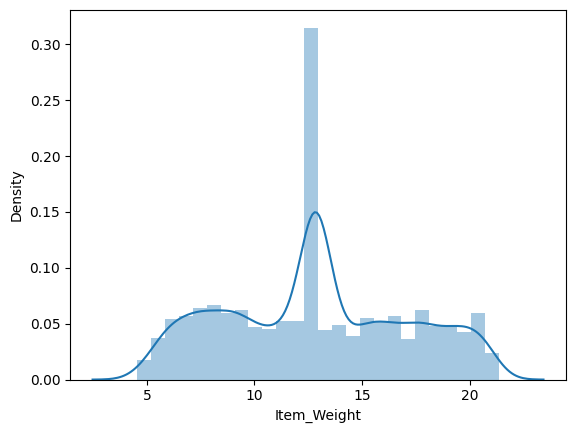

In [ ]:
sns.distplot(df['Item_Weight'])
plt.show()

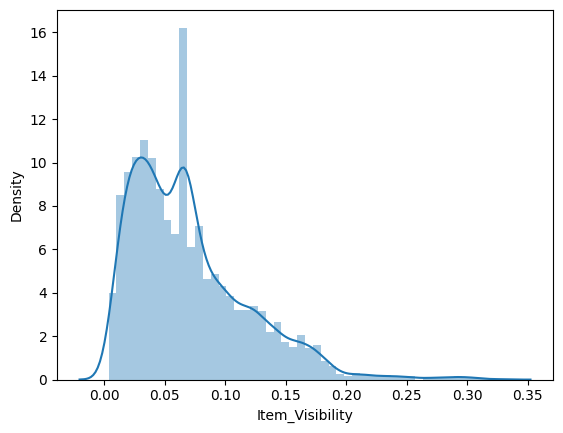

In [ ]:
sns.distplot(df['Item_Visibility'])
plt.show()

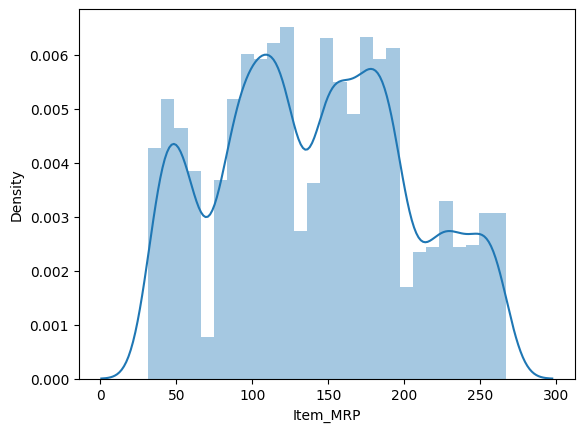

In [ ]:
sns.distplot(df['Item_MRP'])
plt.show()

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_years_
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,foods,25
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,15
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,foods,25
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,foods,26
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-consumables,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,foods,37
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,foods,22
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,non-consumables,20
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,foods,15


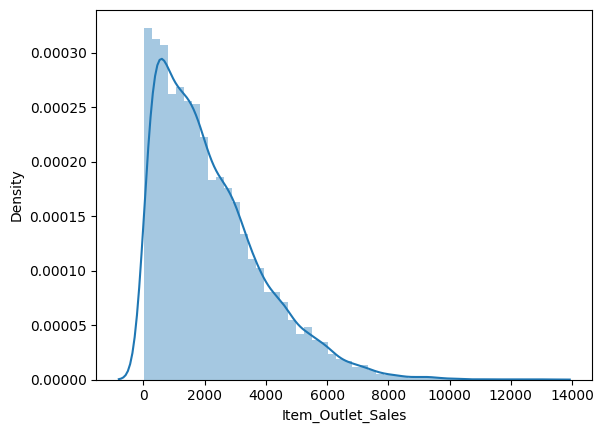

In [ ]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

In [ ]:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

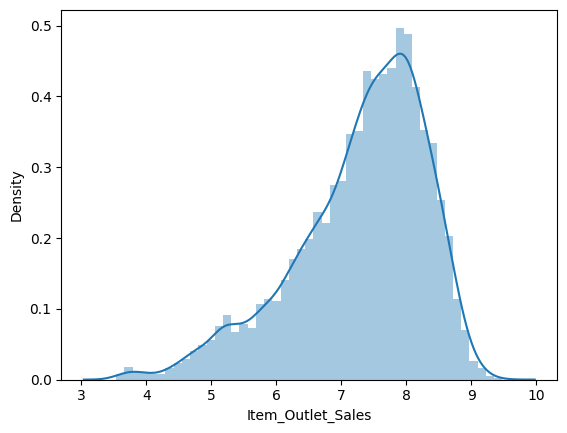

In [ ]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

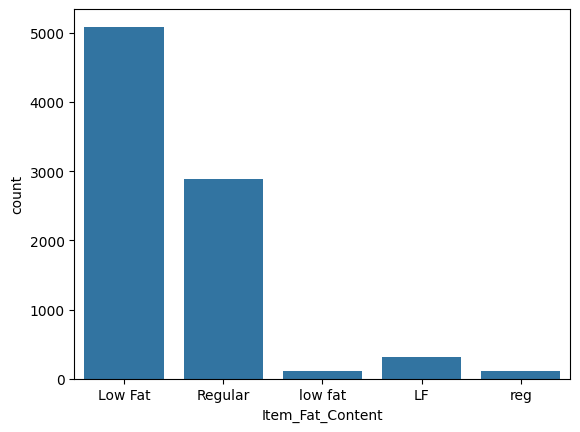

In [ ]:
sns.countplot(x = df["Item_Fat_Content"])
plt.show()

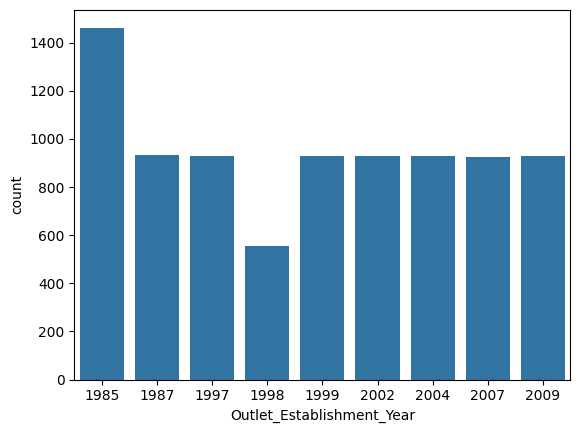

In [ ]:
sns.countplot(x= df['Outlet_Establishment_Year'])
plt.show()

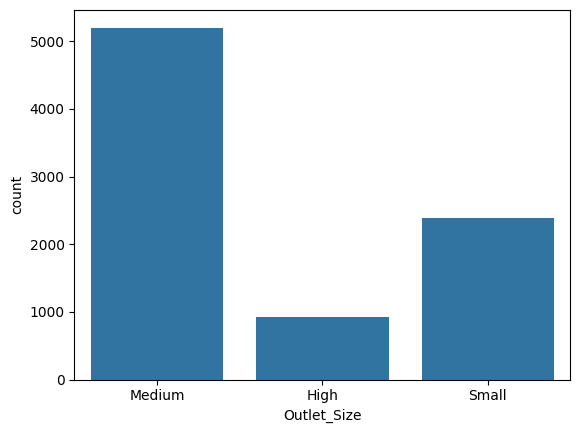

In [ ]:
sns.countplot(x=df['Outlet_Size'])
plt.show()

In [ ]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_years_
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,foods,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,foods,25


In [ ]:
dfc= df.iloc[:,[1,3,5,7,11,13]]

In [ ]:
dfc

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_years_
0,9.300,0.016047,249.8092,1999,8.225808,25
1,5.920,0.019278,48.2692,2009,6.096776,15
2,17.500,0.016760,141.6180,1999,7.648868,25
3,19.200,0.066132,182.0950,1998,6.597664,26
4,8.930,0.066132,53.8614,1987,6.903451,37
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,7.929984,37
8519,8.380,0.046982,108.1570,2002,6.310436,22
8520,10.600,0.035186,85.1224,2004,7.085159,20
8521,7.210,0.145221,103.1332,2009,7.521100,15


In [ ]:
corr = dfc.corr()

In [ ]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_years_
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.008059,0.008301
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.008059,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_years_,0.008301,0.078355,-0.005020,-1.000000,-0.077032,1.000000


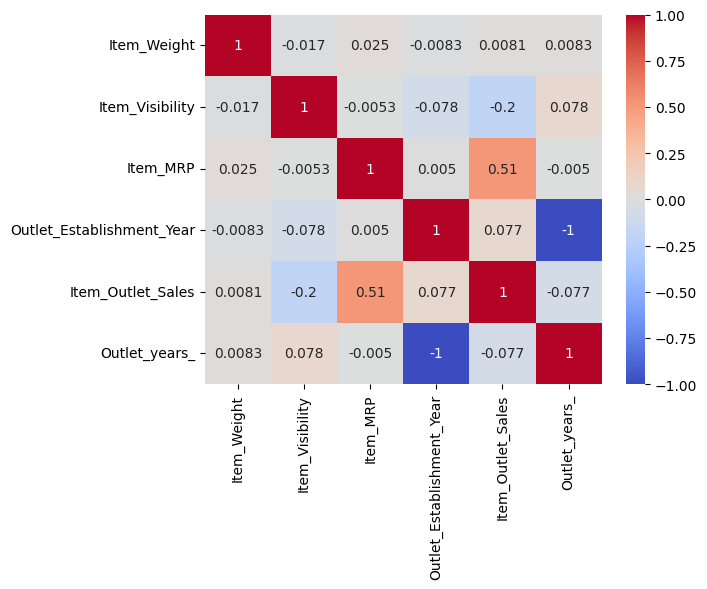

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_years_
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,foods,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,foods,25
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,6.597664,foods,26
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,non-consumables,37


In [ ]:
import pandas as pd
df = pd.read_csv('Train.csv')
df.head(), df.columns.tolist()


(  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
 0           FDA15         9.30          Low Fat         0.016047   
 1           DRC01         5.92          Regular         0.019278   
 2           FDN15        17.50          Low Fat         0.016760   
 3           FDX07        19.20          Regular         0.000000   
 4           NCD19         8.93          Low Fat         0.000000   
 
                Item_Type  Item_MRP Outlet_Identifier  \
 0                  Dairy  249.8092            OUT049   
 1            Soft Drinks   48.2692            OUT018   
 2                   Meat  141.6180            OUT049   
 3  Fruits and Vegetables  182.0950            OUT010   
 4              Household   53.8614            OUT013   
 
    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
 0                       1999      Medium               Tier 1   
 1                       2009      Medium               Tier 3   
 2                       1999      Medium 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy of the dataframe to work with
df_encoded = df.copy()

# List of categorical columns for encoding
categorical_cols = df_encoded.select_dtypes(include='object').columns.tolist()

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Apply One Hot Encoding to the original categorical columns
df_onehot_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the transformed dataframes
df_encoded.head(), df_onehot_encoded.head()

(   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
 0              156         9.30                 1         0.016047          4   
 1                8         5.92                 2         0.019278         14   
 2              662        17.50                 1         0.016760         10   
 3             1121        19.20                 2         0.000000          6   
 4             1297         8.93                 1         0.000000          9   
 
    Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
 0  249.8092                  9                       1999            1   
 1   48.2692                  3                       2009            1   
 2  141.6180                  9                       1999            1   
 3  182.0950                  0                       1998            3   
 4   53.8614                  1                       1987            0   
 
    Outlet_Location_Type  Outlet_Type  Item_Outlet_Sal

In [ ]:
X = df_onehot_encoded.drop('Item_Outlet_Sales', axis=1)
y = df_onehot_encoded['Item_Outlet_Sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# ... (Your existing code for loading and preprocessing data) ...

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now you can train your model
model = LinearRegression()
model.fit(X_train, y_train)

# ... (Rest of your code) ...

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.41708812602751033
1727936.3593420729


In [ ]:
import matplotlib.pyplot as plt

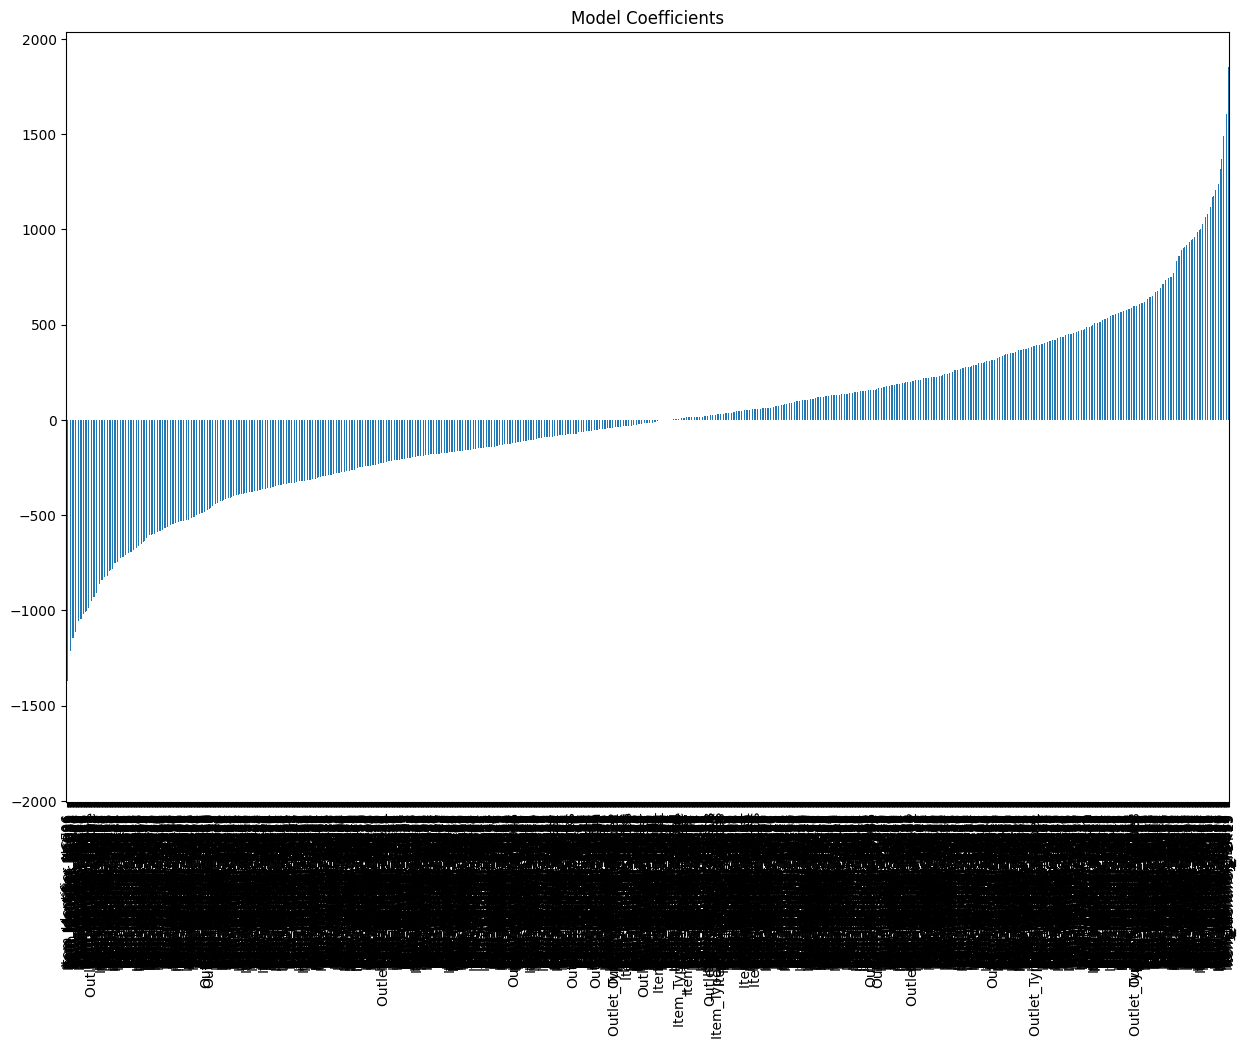

In [ ]:
from sklearn.linear_model import Ridge
Model = Ridge()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
coef = pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(15,10))
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

0.5587735649094682


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

0.2397726379466052
